Colab 🤩 -> https://drive.google.com/file/d/1sr9lDsVAuhdIQ5YVbj9_DkUs0gC6lSoZ/view?usp=sharing

In [53]:
import numpy as np
from scipy.stats import norm
from scipy.special import factorial
from scipy.stats import binom, poisson
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import sqrt, exp, pi
warnings.filterwarnings('ignore')

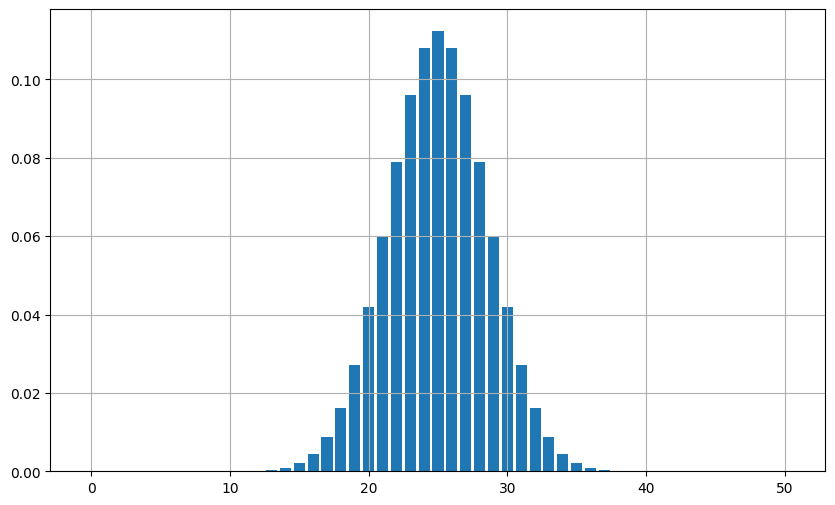

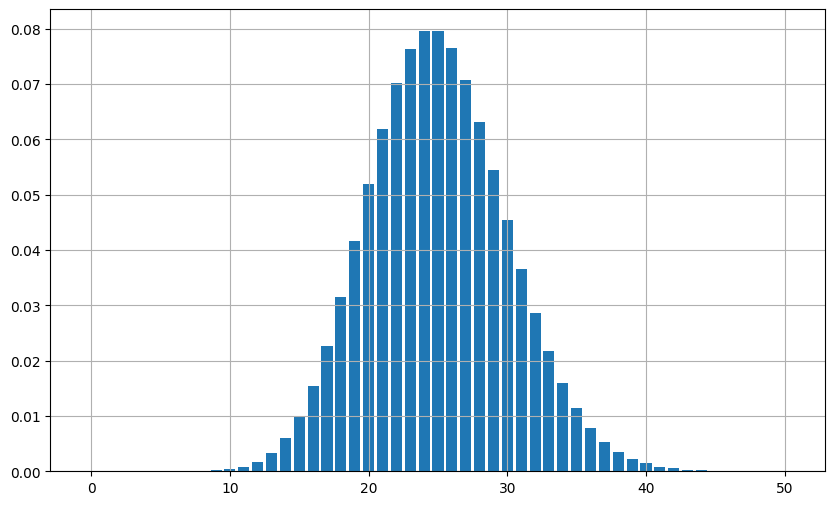

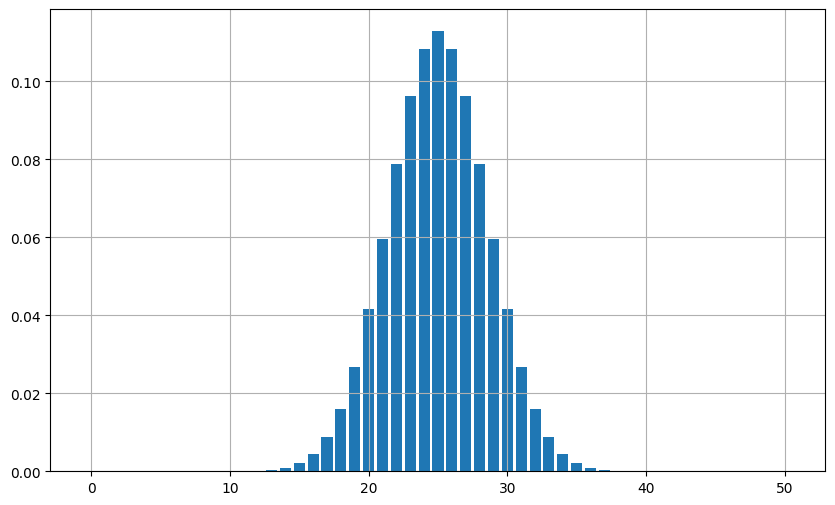

In [55]:
def norm(k, n, p):
	return binom.pmf(k, n, p)

def poissonStats(k, n, p):
	mu = n * p
	return poisson.pmf(k, mu)

def Moivre(n, p):
    mu = n * p
    sigma = sqrt(n * p * (1 - p))
    return (1 / (sigma * sqrt(2 * pi))) * exp(-((k - mu)**2) / (2 * sigma**2))

n = 50
p = 0.5
size = 1000
resultNorm = []
resultPoisson = []
resultMoivre = []
kValue = []

for k in range(50+1):
	resultNorm.append(norm(k, n, p))
	resultPoisson.append(poissonStats(k, n, p))
	resultMoivre.append(Moivre(n, p))
	kValue.append(k)

fig = plt.figure(figsize=(10, 6))
plt.bar(x = kValue, height = resultNorm)
plt.grid(True)
plt.show()

fig = plt.figure(figsize = (10, 6))
plt.bar(x = kValue, height= resultPoisson)
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(10, 6))
plt.bar(x = kValue, height = resultMoivre)
plt.grid(True)
plt.show()

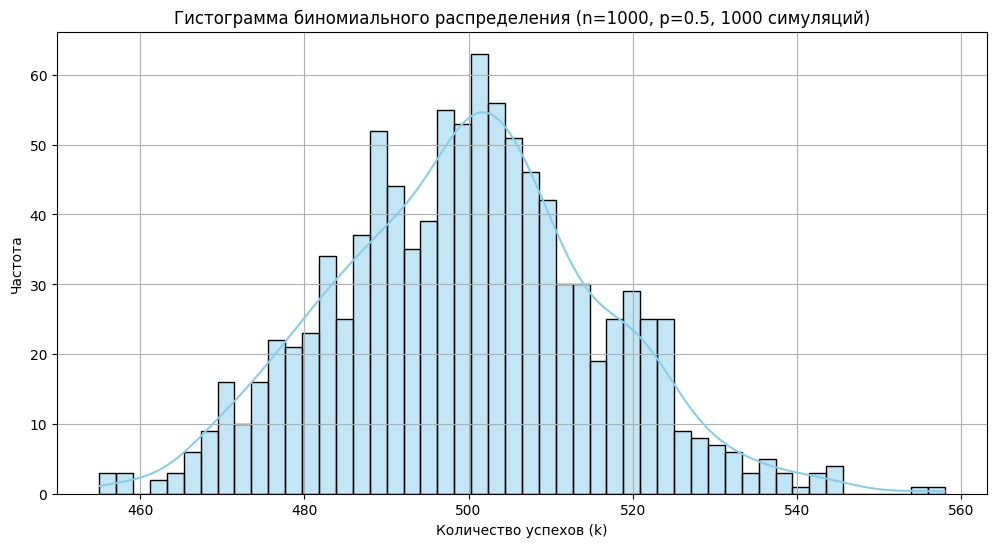

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import seaborn as sns

n = 1000     # Количество испытаний
p = 0.5     # Вероятность успеха в одном испытании
num_simulations = 1000  # Количество симуляций

# 1. Генерируем случайные данные из биномиального распределения
simulated_data = binom.rvs(n, p, size=num_simulations)

# 2. Строим гистограмму этих данных
fig = plt.figure(figsize=(12, 6))
sns.histplot(simulated_data, bins=50, kde=True, color='skyblue')  # kde=True для оценки плотности
plt.xlabel("Количество успехов (k)")
plt.ylabel("Частота")
plt.title(f"Гистограмма биномиального распределения (n={n}, p={p}, {num_simulations} симуляций)")
plt.grid(True)
plt.show()